In [29]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import scipy

from itertools import combinations

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

import os
import sys

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools



# sns.set_style('dark')
# sns.set_style('ticks')
# plt.style.use('dark_background')

In [30]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

merged_fitness = merged_fitness[~merged_fitness['source_publication'].isin(['Li2019'])]

WT Evo2D 482 236 119
CYR1 Evo2D 529 224 62
GPB2 Evo2D 1215 229 13
TOR1 Evo2D 715 317 46
IRA1_MIS Evo2D 142 16 90
IRA1_NON Evo2D 95 0 95


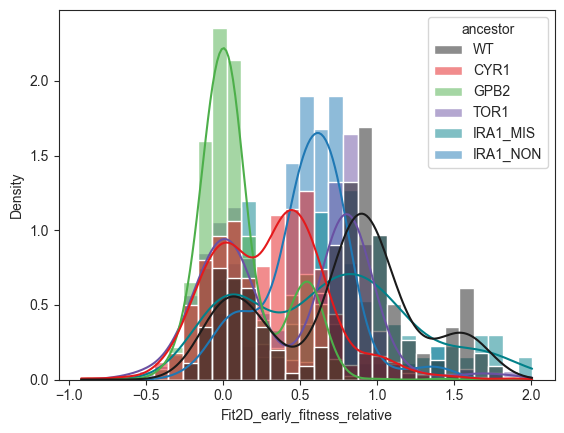

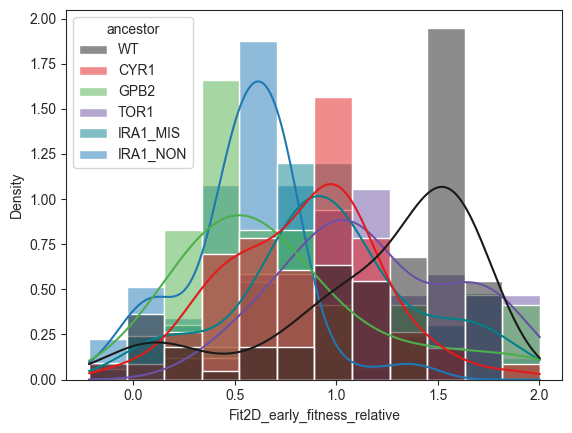

In [31]:
evo_cond_list = ['Evo2D']
anc_list = ['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']

for evo_cond in evo_cond_list:
    
    this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]
    sns.histplot(this_condition,x='Fit2D_early_fitness_relative',
                 hue='ancestor',common_norm=False,stat='density',kde=True,
                 hue_order=anc_list,
                 palette=[tools.anc_color_map[anc] for anc in anc_list])
    
    for anc in anc_list:
    
       
        this_pairing = merged_fitness[(merged_fitness['ancestor']==anc) & (merged_fitness['evolution_condition']==evo_cond)]
        pure_diploids = this_pairing[this_pairing['class_new']=='pure_diploids']
        adaptive_nondiploids = this_pairing[~this_pairing['class_new'].isin(['pure_diploids','neutral_haploids'])]
        print(anc,evo_cond,len(this_pairing),len(pure_diploids),len(adaptive_nondiploids))
        
plt.figure()

for evo_cond in evo_cond_list:
    
    this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]
    adaptive_nondiploids = this_condition[~this_condition['class_new'].isin(['pure_diploids','neutral_haploids'])]
    sns.histplot(adaptive_nondiploids,x='Fit2D_early_fitness_relative',
                 hue='ancestor',common_norm=False,stat='density',kde=True,
                 hue_order=anc_list,
                 palette=[tools.anc_color_map[anc] for anc in anc_list])
    
    

/var/folders/x6/q0wb9df97nj1wnk5c4t0k7840000gn/T/ipykernel_73709/817618218.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.violinplot(this_condition,x='ancestor',y='Fit2D_early_fitness_relative',


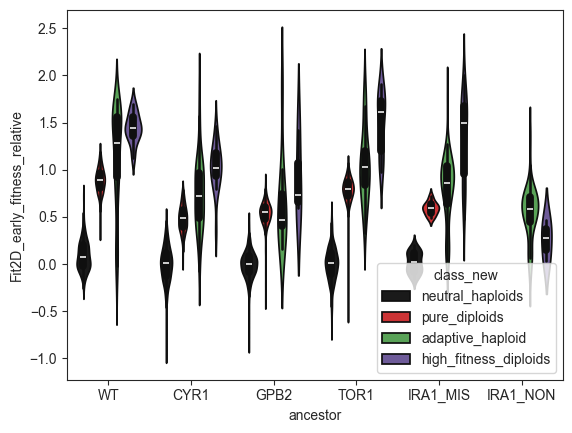

In [32]:
this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]


for evo_cond in evo_cond_list:
    
    this_condition = merged_fitness[merged_fitness['evolution_condition']==evo_cond]
    
    sns.violinplot(this_condition,x='ancestor',y='Fit2D_early_fitness_relative',
                   hue='class_new',order=anc_list,hue_order=['neutral_haploids','pure_diploids','adaptive_haploid','high_fitness_diploids'],
                   palette=[tools.anc_color_map[anc] for anc in anc_list])
    
#     sns.violinplot(this_condition,x='ancestor',y='Fit2D_early_fitnes')

#     for anc in anc_list:
        
        

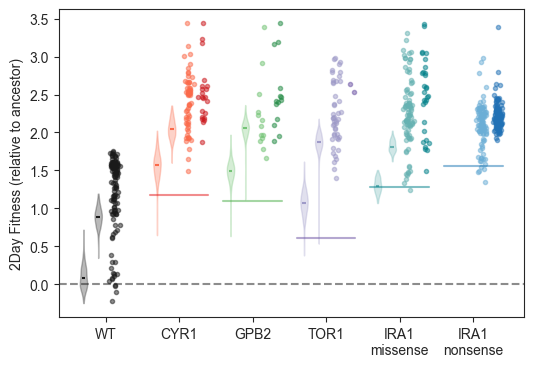

In [34]:
this_df = merged_fitness[~merged_fitness['source_publication'].isin(['Li2019'])]
plt.figure(figsize=(6,4))
to_plot = 'Fit2D_early_fitness'
# to_plot = 'Fit2D_early_fitness_relative'
counter = 0
for anc in anc_list:
    this_anc = this_df[this_df['ancestor']==anc]
    for mut_set in ['neutral_haploids','pure_diploids','Evo2D','Evo3D']:
        if 'Evo' in mut_set:
            this_set = this_anc[this_anc['class_new'].isin(['adaptive_haploid','high_fitness_diploids'])]
            this_set = this_set[this_set['evolution_condition']==mut_set]
            
            if '2D' in mut_set:
                plt.scatter([tools.jitter_point(counter+0.1) for x in range(len(this_set))],this_set[to_plot],
                       color=tools.anc_evo_cond_color_map[anc][mut_set],alpha=0.5,marker='.')
            else:
                plt.scatter([tools.jitter_point(counter+0.2) for x in range(len(this_set))],this_set[to_plot],
                       color=tools.anc_evo_cond_color_map[anc][mut_set],alpha=0.5,marker='.')
        else:
            
            this_set = this_anc[this_anc['class_new'].isin([mut_set])]
            
            if len(this_set) > 0:

#             plt.boxplot(this_set[to_plot],positions=[counter])
                violin_parts = plt.violinplot(this_set[to_plot],positions=[counter],showextrema=False,showmedians=True)
            
                for pc in violin_parts['bodies']:
                    pc.set_facecolor(tools.anc_evo_cond_color_map[anc]['Evo2D'])
                    pc.set_edgecolor(tools.anc_evo_cond_color_map[anc]['Evo2D'])
                    pc.set_color(tools.anc_evo_cond_color_map[anc]['Evo2D'])
                    
                for partname in ['cmedians']:
                    vp = violin_parts[partname]
                    vp.set_edgecolor(tools.anc_evo_cond_color_map[anc]['Evo2D'])
#                     vp.set_linewidth(1)
            
#             plt.scatter([tools.jitter_point(counter) for x in range(len(this_set))],this_set[to_plot],
#                        color=tools.anc_evo_cond_color_map[anc]['Evo2D'],alpha=0.1)
            
        counter += 1
    
    if 'relative' not in to_plot:
        plt.ylabel('2Day Fitness (relative to ancestor)')
        if anc != 'WT':
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

            plt.plot([counter-4.5,counter-0.5],[background_mutant[to_plot].values[0],background_mutant[to_plot].values[0]],
                     color=tools.anc_color_map[anc],alpha=0.5)
    else:
        plt.ylabel('2Day Fitness (relative to parental strain)')
    
    counter += 1


# anc_nam
plt.xticks([5*x+1.5 for x in range(len(anc_list))],[f'{tools.anc_names[anc]}' for anc in anc_list ])

plt.axhline(y=0,color='k',linestyle='--',alpha=0.5)

plt.savefig(f'{home_dir}/figures/analysis/fitness/{to_plot}_Evo2D_Evo3D_all.pdf',bbox_inches='tight')

In [39]:
this_df[this_df['class_new'].isin(['adaptive_haploid','high_fitness_diploids'])]['Fit2D_early_fitness']

0       2.790907
1       3.385820
2       3.182275
3       2.479754
4       3.041573
          ...   
4959    0.290578
4982    1.123674
4987    1.460944
5004    2.524036
5017    2.155999
Name: Fit2D_early_fitness, Length: 681, dtype: float64

In [43]:
np.mean(this_df[this_df['ancestor'].isin(['CYR1','TOR1','GPB2','IRA1_MIS','IRA1_NON']) & 
        this_df['class_new'].isin(['adaptive_haploid','high_fitness_diploids'])
               ]['Fit2D_early_fitness'].values)

2.2301851919087823

In [44]:
np.median(this_df[this_df['ancestor'].isin(['CYR1','TOR1','GPB2','IRA1_MIS','IRA1_NON']) & 
        this_df['class_new'].isin(['adaptive_haploid','high_fitness_diploids'])
               ]['Fit2D_early_fitness'].values)

2.205347459112113

In [51]:

print('Average 2nd step 2-day fitness:',np.mean(this_df[this_df['ancestor'].isin(['CYR1','TOR1','GPB2','IRA1_MIS','IRA1_NON']) & 
        this_df['class_new'].isin(['adaptive_haploid','high_fitness_diploids']) & 
            this_df['evolution_condition'].isin(['Evo2D','Evo3D']) 
               ]['Fit2D_early_fitness_relative'].values))

print('Average 2nd step Evo2D 2-day fitness:',np.mean(this_df[this_df['ancestor'].isin(['CYR1','TOR1','GPB2','IRA1_MIS','IRA1_NON']) & 
        this_df['class_new'].isin(['adaptive_haploid','high_fitness_diploids']) & 
        this_df['evolution_condition'].isin(['Evo2D']) 
               ]['Fit2D_early_fitness_relative'].values))

print('Average 2nd step Evo3D 2-day fitness:',np.mean(this_df[this_df['ancestor'].isin(['CYR1','TOR1','GPB2','IRA1_MIS','IRA1_NON']) & 
        this_df['class_new'].isin(['adaptive_haploid','high_fitness_diploids']) & 
        this_df['evolution_condition'].isin(['Evo3D']) 
               ]['Fit2D_early_fitness_relative'].values))


Average 2nd step 2-day fitness: 0.8195706428565435
Average 2nd step Evo2D 2-day fitness: 0.8262542875184069
Average 2nd step Evo3D 2-day fitness: 0.8094459138143145


In [60]:
print(np.mean(this_df[
        this_df['ancestor'].isin(['CYR1','TOR1','GPB2','IRA1_MIS','IRA1_NON']) & 
        this_df['class_new'].isin(['pure_diploids']) 
               ]['Fit2D_early_fitness_relative'].values))


this_df[this_df['class_new'].isin(['pure_diploids'])].groupby('ancestor')['Fit2D_early_fitness_relative'].mean()

0.6288525151942461


ancestor
CYR1        0.483918
GPB2        0.551462
IRA1_MIS    0.520242
TOR1        0.805481
WT          0.888513
Name: Fit2D_early_fitness_relative, dtype: float64

In [64]:
np.max(this_df[this_df['ancestor'].isin(['IRA1_NON'])]['Fit2D_early_fitness'].values)
# np.max(this_df[this_df['ancestor'].isin(['IRA1_NON'])]['Fit2D_early_fitness_relative'].values)



3.3889935008710284

In [72]:
this_df[this_df['ancestor'].isin(['IRA1_MIS'])].sort_values('Fit2D_early_fitness')[[
    'barcode','gene','Fit2D_early_fitness','ResPerHour','FerPerHour','Fit2D_early_fitness_relative','ResPerHour_relative','FerPerHour_relative']]

,barcode,gene,Fit2D_early_fitness,ResPerHour,FerPerHour,Fit2D_early_fitness_relative,ResPerHour_relative,FerPerHour_relative
4563,CATAAAAAGACTAATCTTATTAATGC_TCACTAACCGTCAAAGGGT...,NaN,0.921542,0.017909,0.021795,-0.378567,-0.009058,-0.010904
3629,CATAAAAAGACTAATCTTATTAATGC_AGAATAATGAACAAAATGC...,NaN,1.011025,0.006048,0.047703,-0.289084,-0.020920,0.015005
2398,CATAAAAAGACTAATCTTATTAATGC_GGGCAAAGTTGAAAGGCCT...,NaN,1.068943,0.017305,0.032233,-0.231166,-0.009662,-0.000465
4033,CATAAAAAGACTAATCTTATTAATGC_GTTTAAACCGGTAAGCTAT...,NaN,1.076535,0.020705,0.032363,-0.223574,-0.006262,-0.000336
3574,CATAAAAAGACTAATCTTATTAATGC_ATTTAAATTACAAAGTGCT...,NaN,1.078520,0.017121,0.031706,-0.221589,-0.009846,-0.000993
...,...,...,...,...,...,...,...,...
320,CATTGAATCACAAAATAGGTTAGATG_TGTTAAACCCATAAATTCG...,NaN,3.082143,0.092885,0.029995,1.782034,0.065918,-0.002703
26,TGATCAATCTACAAAAATATTTAATG_AACTGAAGACTAAATATGA...,RTG2,3.215411,0.099134,0.029686,1.915302,0.072167,-0.003012
746,CATTGAATCACAAAATAGGTTAGATG_CTCAAAAACAAAAATAAAA...,MKT1,3.304445,0.090395,0.046202,2.004336,0.063427,0.013504
5,TATCGAAACCCAAAGAGATTTAATCG_CGATCAAAGACTAACTTAT...,IRA1+MKT1+SPB1,3.397992,0.084059,0.062750,2.097883,0.057092,0.030052
